In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../churn.csv")

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Understanding Data

In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
sns.set_style(style="whitegrid")
plt.figure(figsize=(12, 10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Churn')

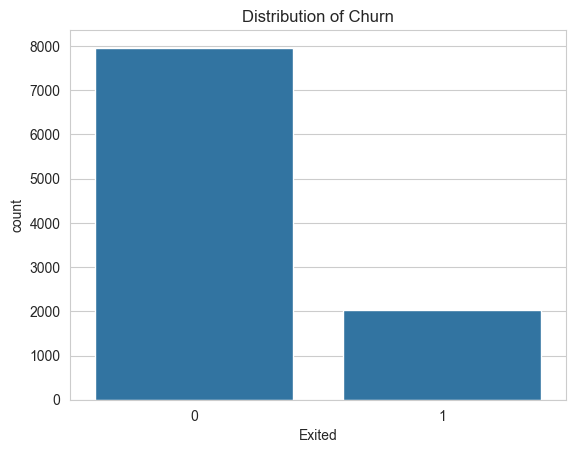

In [6]:
sns.countplot(x="Exited", data=df)
plt.title("Distribution of Churn")

Text(0.5, 1.0, 'Age distribution')

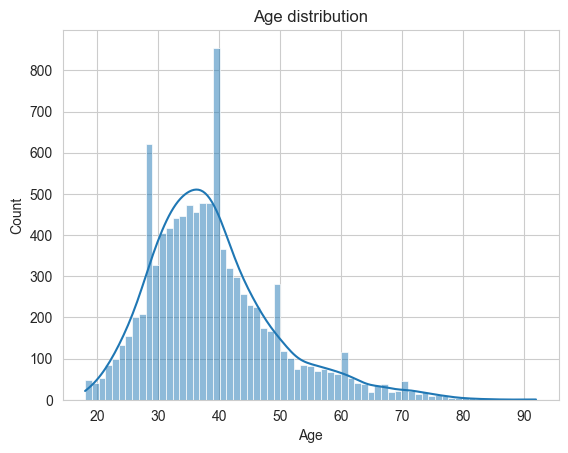

In [7]:
sns.histplot(data=df, x="Age", kde=True)
plt.title("Age distribution")

Text(0.5, 1.0, 'Credit Score vs Age')

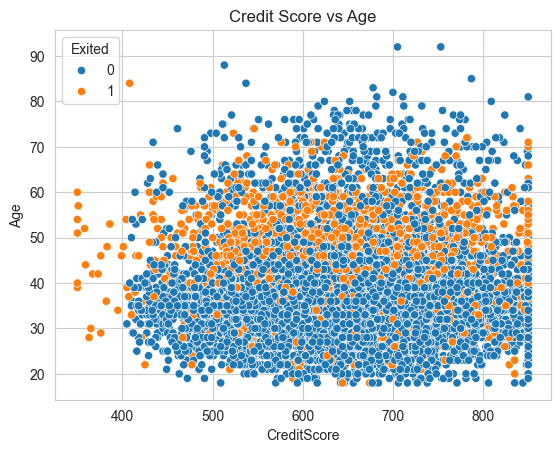

In [8]:
sns.scatterplot(data=df, x="CreditScore", y="Age", hue="Exited")
plt.title("Credit Score vs Age")

Text(0.5, 1.0, 'Balance Distribution by Churn')

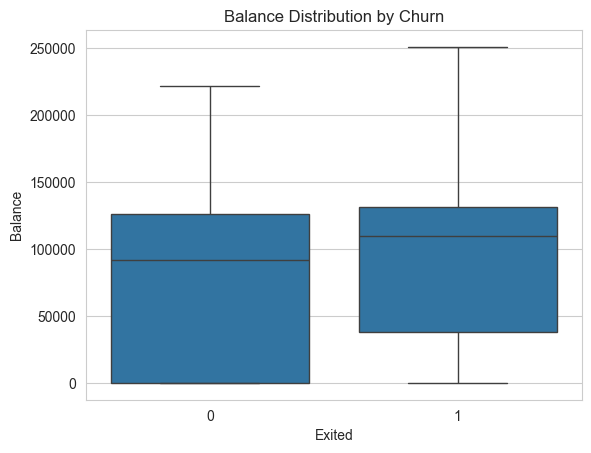

In [9]:
sns.boxplot(x="Exited", y="Balance", data=df)
plt.title("Balance Distribution by Churn")

Text(0.5, 1.0, 'Credit Score Distribution by Churn')

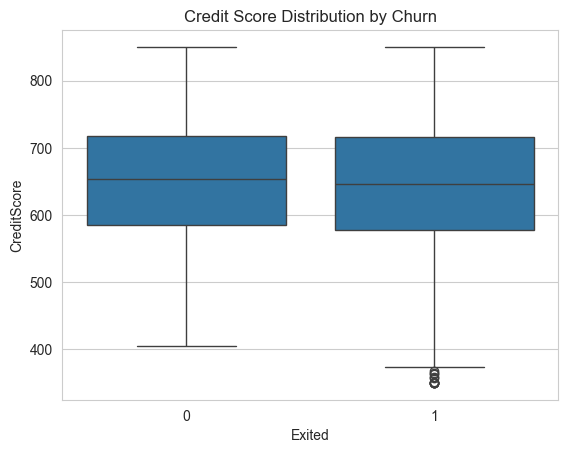

In [10]:
sns.boxplot(x="Exited", y="CreditScore", data=df)
plt.title("Credit Score Distribution by Churn")

# Preprocessing

In [11]:
features = df.drop(columns=["RowNumber", "CustomerId", "Surname", "Exited"], axis=1) # Drop unique columns and target column

In [12]:
features

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [13]:
features = pd.get_dummies(features, columns=["Geography", "Gender"])

In [14]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True


In [15]:
target = df["Exited"]

In [16]:
target

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [19]:
# Scaling (all features contribute equally)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [20]:
X_train[0]

array([ 0.35649971, -0.6557859 ,  0.34567966, -1.21847056,  0.80843615,
        0.64920267,  0.97481699,  1.36766974,  1.00150113, -0.57946723,
       -0.57638802, -0.91324755,  0.91324755])

In [21]:
X_train[1]

array([-0.20389777,  0.29493847, -0.3483691 ,  0.69683765,  0.80843615,
        0.64920267,  0.97481699,  1.6612541 , -0.99850112,  1.72572313,
       -0.57638802, -0.91324755,  0.91324755])

# Train Machine Learning Model

## Logistic Regression (binary classification)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [23]:
lr_model = LogisticRegression(random_state=42)

In [24]:
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [25]:

lr_predictions = lr_model.predict(X_test)

In [26]:
lr_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
# Evaluate performance
lr_accuracy = accuracy_score(y_test, lr_predictions)

In [28]:
lr_accuracy

0.811

In [29]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

In [30]:
def evaluate_and_save_model(model, X_train, X_test, y_train, y_test, filename):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model.__class__.__name__} Accuracy: {accuracy:.4f}")
    print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")
    print("-----------")

    with open(f"models/{filename}", "wb") as file:
        pickle.dump(model, file)
    
    print(f"Model saved as {filename}")

In [31]:
xgb_model = xgb.XGBClassifier(random_state=42)
evaluate_and_save_model(xgb_model, X_train, X_test, y_train, y_test, "xgb_model.pkl")

dt_model = DecisionTreeClassifier(random_state=42)
evaluate_and_save_model(dt_model, X_train, X_test, y_train, y_test, "dt_model.pkl")

rf_model = RandomForestClassifier(random_state=42)
evaluate_and_save_model(rf_model, X_train, X_test, y_train, y_test, "rf_model.pkl")

nb_model = GaussianNB()
evaluate_and_save_model(nb_model, X_train, X_test, y_train, y_test, "nb_model.pkl")

knn_model = KNeighborsClassifier()
evaluate_and_save_model(knn_model, X_train, X_test, y_train, y_test, "knn_model.pkl")

svm_model = SVC(random_state=42)
evaluate_and_save_model(svm_model, X_train, X_test, y_train, y_test, "svm_model.pkl")

XGBClassifier Accuracy: 0.7455

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.83      1607
           1       0.39      0.54      0.45       393

    accuracy                           0.75      2000
   macro avg       0.63      0.67      0.64      2000
weighted avg       0.78      0.75      0.76      2000

-----------
Model saved as xgb_model.pkl
DecisionTreeClassifier Accuracy: 0.7850

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.46      0.51      0.48       393

    accuracy                           0.79      2000
   macro avg       0.67      0.68      0.67      2000
weighted avg       0.80      0.79      0.79      2000

-----------
Model saved as dt_model.pkl
RandomForestClassifier Accuracy: 0.8645

Classification Report:
              precision    recall  f1-score   support

           0       0.88    

![title](img/precision_or_recall.png)

In [32]:
feature_importances = xgb_model.feature_importances_
feature_names = features.columns

In [33]:
feature_importances

array([0.03500515, 0.10955004, 0.03005428, 0.05278617, 0.32388842,
       0.03194036, 0.16414644, 0.03265523, 0.04646329, 0.09137332,
       0.0368547 , 0.04528258, 0.        ], dtype=float32)

In [34]:
feature_names

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [35]:
feature_importances_df = pd.DataFrame({
    "feature": feature_names,
    "importance": feature_importances
})

In [36]:
feature_importances_df

,feature,importance
0,CreditScore,0.035005
1,Age,0.109550
2,Tenure,0.030054
3,Balance,0.052786
4,NumOfProducts,0.323888
5,HasCrCard,0.031940
6,IsActiveMember,0.164146
7,EstimatedSalary,0.032655
8,Geography_France,0.046463
9,Geography_Germany,0.091373


In [37]:
feature_importances_df = feature_importances_df.sort_values("importance", ascending=False)

In [38]:
feature_importances_df

,feature,importance
4,NumOfProducts,0.323888
6,IsActiveMember,0.164146
1,Age,0.109550
9,Geography_Germany,0.091373
3,Balance,0.052786
8,Geography_France,0.046463
11,Gender_Female,0.045283
10,Geography_Spain,0.036855
0,CreditScore,0.035005
7,EstimatedSalary,0.032655


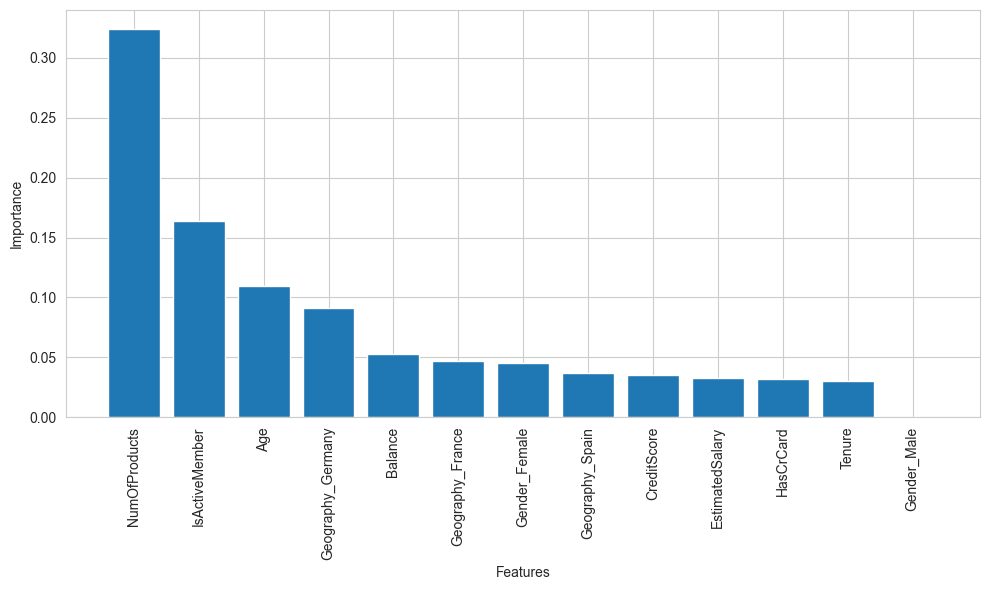

In [39]:
plt.figure(figsize=(10,6))
plt.bar(feature_importances_df["feature"], feature_importances_df["importance"])
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

![title](img/ways_to_improve_model_accuracy.png)

In [40]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True


In [41]:
features["CLV"] = df["Balance"] * df["EstimatedSalary"] / 100000

In [42]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.000000
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,94319.527887
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,181904.056115
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.000000
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,99259.102400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True,0.000000
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True,58344.761420
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False,0.000000
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True,69736.344344


In [43]:
features["AgeGroup"] = pd.cut(df["Age"], bins=[0, 30, 45, 60, 100], labels=["Young", "MiddleAge", "Senior", "Elderly"])

In [44]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV,AgeGroup
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.000000,MiddleAge
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,94319.527887,MiddleAge
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,181904.056115,MiddleAge
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.000000,MiddleAge
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,99259.102400,MiddleAge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True,0.000000,MiddleAge
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True,58344.761420,MiddleAge
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False,0.000000,MiddleAge
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True,69736.344344,MiddleAge


In [45]:
features["TenureAgeRatio"] = df["Tenure"] / df["Age"]

In [46]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV,AgeGroup,TenureAgeRatio
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.000000,MiddleAge,0.047619
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,94319.527887,MiddleAge,0.024390
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,181904.056115,MiddleAge,0.190476
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.000000,MiddleAge,0.025641
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,99259.102400,MiddleAge,0.046512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True,0.000000,MiddleAge,0.128205
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True,58344.761420,MiddleAge,0.285714
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False,0.000000,MiddleAge,0.194444
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True,69736.344344,MiddleAge,0.071429


In [47]:
features = pd.get_dummies(features, drop_first=True)

In [48]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV,TenureAgeRatio,AgeGroup_MiddleAge,AgeGroup_Senior,AgeGroup_Elderly
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.000000,0.047619,True,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,94319.527887,0.024390,True,False,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,181904.056115,0.190476,True,False,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.000000,0.025641,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,99259.102400,0.046512,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True,0.000000,0.128205,True,False,False
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True,58344.761420,0.285714,True,False,False
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False,0.000000,0.194444,True,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True,69736.344344,0.071429,True,False,False


In [49]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [50]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV,TenureAgeRatio,AgeGroup_MiddleAge,AgeGroup_Senior,AgeGroup_Elderly
9254,686,32,6,0.00,2,1,1,179093.26,True,False,False,False,True,0.000000,0.187500,True,False,False
1561,632,42,4,119624.60,2,1,1,195978.86,False,True,False,False,True,234438.927360,0.095238,True,False,False
1670,559,24,3,114739.92,1,1,0,85891.02,False,False,True,False,True,98551.287635,0.125000,False,False,False
6087,561,27,9,135637.00,1,1,0,153080.40,True,False,False,True,False,207633.662148,0.333333,False,False,False
6669,517,56,9,142147.32,1,0,0,39488.04,True,False,False,False,True,56131.190581,0.160714,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,True,False,False,False,True,48367.430996,0.148148,False,True,False
5191,682,58,1,0.00,1,1,1,706.50,True,False,False,True,False,0.000000,0.017241,False,True,False
5390,735,38,1,0.00,3,0,0,92220.12,True,False,False,True,False,0.000000,0.026316,True,False,False
860,667,43,8,190227.46,1,1,0,97508.04,True,False,False,False,True,185487.067788,0.186047,True,False,False


In [51]:
xgboost_model = xgb.XGBClassifier(random_state=42)
evaluate_and_save_model(xgboost_model, X_train, X_test, y_train, y_test, "xgb_feature_engineered_model.pkl")

XGBClassifier Accuracy: 0.8540

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1607
           1       0.67      0.50      0.58       393

    accuracy                           0.85      2000
   macro avg       0.78      0.72      0.74      2000
weighted avg       0.84      0.85      0.85      2000

-----------
Model saved as xgb_feature_engineered_model.pkl


## S.M.O.T.E

In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
smote = SMOTE(random_state=42)

In [54]:
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [55]:
evaluate_and_save_model(xgboost_model, X_resampled, X_test, y_resampled, y_test, "xgb_smote_model.pkl")

XGBClassifier Accuracy: 0.8545

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1607
           1       0.65      0.55      0.60       393

    accuracy                           0.85      2000
   macro avg       0.77      0.74      0.75      2000
weighted avg       0.85      0.85      0.85      2000

-----------
Model saved as xgb_smote_model.pkl


## Ensemble

In [56]:
from sklearn.ensemble import VotingClassifier

In [57]:
voting_clf_soft = VotingClassifier(
    estimators=[("xgboost", xgb.XGBClassifier(random_state=42)), ("rf", RandomForestClassifier(random_state=42)), ("svm", SVC(random_state=42, probability=True))],
    voting="soft"
)

In [58]:
evaluate_and_save_model(voting_clf_soft, X_resampled, X_test, y_resampled, y_test, "voting_clf_soft.pkl")

VotingClassifier Accuracy: 0.8615

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1607
           1       0.68      0.55      0.61       393

    accuracy                           0.86      2000
   macro avg       0.79      0.75      0.76      2000
weighted avg       0.85      0.86      0.86      2000

-----------
Model saved as voting_clf_soft.pkl


In [59]:
voting_clf_hard = VotingClassifier(
    estimators=[("xgboost", xgb.XGBClassifier(random_state=42)), ("rf", RandomForestClassifier(random_state=42)), ("svm", SVC(random_state=42, probability=True))],
    voting="hard"
)

In [60]:
evaluate_and_save_model(voting_clf_hard, X_resampled, X_test, y_resampled, y_test, "voting_clf_hard.pkl")

VotingClassifier Accuracy: 0.8530

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1607
           1       0.63      0.59      0.61       393

    accuracy                           0.85      2000
   macro avg       0.77      0.75      0.76      2000
weighted avg       0.85      0.85      0.85      2000

-----------
Model saved as voting_clf_hard.pkl


In [61]:
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
gcb = GradientBoostingClassifier(random_state=42)

In [63]:
evaluate_and_save_model(gcb, X_resampled, X_test, y_resampled, y_test, "gcb_model.pkl")

GradientBoostingClassifier Accuracy: 0.8580

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1607
           1       0.66      0.56      0.61       393

    accuracy                           0.86      2000
   macro avg       0.78      0.75      0.76      2000
weighted avg       0.85      0.86      0.85      2000

-----------
Model saved as gcb_model.pkl


In [64]:
from sklearn.ensemble import AdaBoostClassifier

In [65]:
adaboost = AdaBoostClassifier(random_state=42)

In [66]:
evaluate_and_save_model(adaboost, X_resampled, X_test, y_resampled, y_test, "adaboost_model.pkl")

/Users/ivokusijanovic/Desktop/Tutorial/customer-churn-prediction/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier Accuracy: 0.8440

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1607
           1       0.60      0.60      0.60       393

    accuracy                           0.84      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000

-----------
Model saved as adaboost_model.pkl


In [67]:
from sklearn.ensemble import ExtraTreesClassifier

In [68]:
extra_tree_clf = ExtraTreesClassifier(random_state=42)

In [69]:
evaluate_and_save_model(extra_tree_clf, X_resampled, X_test, y_resampled, y_test, "extra_tree_clf.pkl")

ExtraTreesClassifier Accuracy: 0.8480

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1607
           1       0.64      0.51      0.57       393

    accuracy                           0.85      2000
   macro avg       0.76      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000

-----------
Model saved as extra_tree_clf.pkl


In [70]:
from sklearn.ensemble import StackingClassifier

In [71]:
stacking_clf = StackingClassifier(
    estimators=[("rf", RandomForestClassifier(random_state=42)), ("svm", SVC(random_state=42, probability=True))],
    final_estimator=LogisticRegression()
)

In [72]:
evaluate_and_save_model(stacking_clf, X_resampled, X_test, y_resampled, y_test, "stacking_clf.pkl")

StackingClassifier Accuracy: 0.8520

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1607
           1       0.64      0.58      0.61       393

    accuracy                           0.85      2000
   macro avg       0.77      0.75      0.76      2000
weighted avg       0.85      0.85      0.85      2000

-----------
Model saved as stacking_clf.pkl
